#  Deutsch-Josza Algorithm

In [1]:
import qiskit as qi

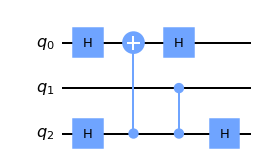

In [4]:
circuit = qi.QuantumCircuit(3)
circuit.h(0)
circuit.h(2)
circuit.cx(2,0)
circuit.h(0)
circuit.cz(2,1)
circuit.h(2)
circuit.draw('mpl')


Implement on an oracle $U_f$

In [6]:
state = qi.quantum_info.Statevector.from_label('001')
state = state.evolve(circuit)
state.draw(output = 'latex')

<IPython.core.display.Latex object>

Function represented by the oracle is balanced or constant

The truth table for the function:\
Input states that output 0: 000, 011, 101, 110 		  
Input States that output 1: 001, 100, 010, 111
\\ Therefore, the function is balanced
      

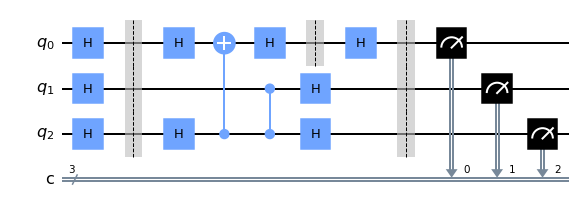

In [7]:
dj = qi.QuantumCircuit(3,3)
dj.h(0)
dj.h(1)
dj.h(2)
dj.barrier()
dj = dj.compose(circuit)
dj.barrier(0)
dj.h(0)
dj.h(1)
dj.barrier()
dj.measure(0,0)
dj.measure(1,1)
dj.measure(2,2)
dj.draw('mpl')

To check if it is balanced:

In [18]:
backend = qi.Aer.get_backend('qasm_simulator')
run = qi.execute(dj, backend, shots = 1024)
result = run.result()
counts = result.get_counts(dj)
print(counts)


{'100': 503, '000': 521}


Since the counts are approximately the same, and the function is balanced, the circuit implements the Deutsch-Josza algorithm